<a href="https://colab.research.google.com/gist/NajwanALharbi/b1704b78d31a2095a649b95a8d676245/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
[[28  0  0]
 [ 0  2  2]
 [ 1  0  5]]
              precision    recall  f1-score   support

       green       0.97      1.00      0.98        28
         red       1.00      0.50      0.67         4
      yellow       0.71      0.83      0.77         6

    accuracy                           0.92        38
   macro avg       0.89      0.78      0.81        38
weighted avg       0.93      0.92      0.92        38



Text(0, 0.5, 'Mean Error')

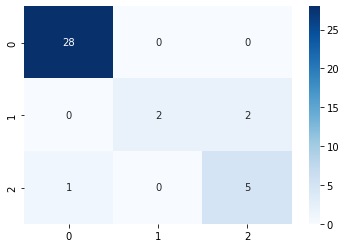

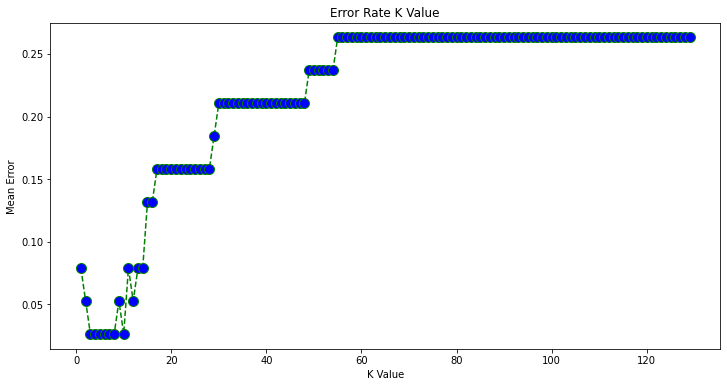

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix




%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
dataset = pd.read_csv('gdrive/My Drive/AILABS/project2data.csv')

dataset.shape
dataset.head()
dataset.describe()


X = dataset[['Confirmed','Deaths','Recovered','Active','New cases','New deaths','New recovered']]
y = dataset['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Matrix = confusion_matrix(y_test, y_pred)
print(Matrix)
print(classification_report(y_test, y_pred))
import seaborn as sns
sns.heatmap(Matrix,annot =True , cmap='Blues')


# Calculating error for K values between 1 and 130
error = []
for i in range(1, 130):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


plt.figure(figsize=(12, 6))
plt.plot(range(1, 130), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')